In [1]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [2]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))


In [3]:
stock_list.head()
stock_list.shape

(2595, 2)

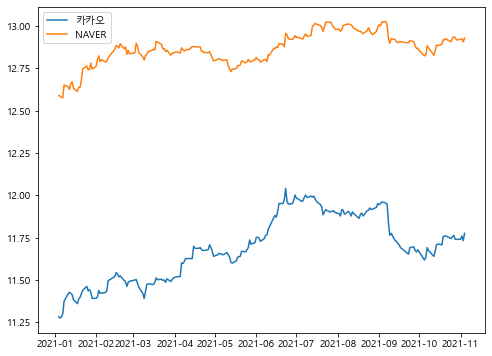

In [6]:
name1 = '카카오'
name2 = 'NAVER'
fromdate = str(20210101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

peal = np.log(df1['종가'])
dev = np.log(df2['종가'])

plt.figure(figsize=(8, 6))
plt.plot(peal)
plt.plot(dev)
plt.legend([f'{name1}',f'{name2}'])
plt.show()

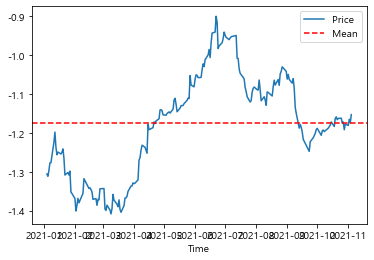

In [7]:
plt.plot(peal-dev)
plt.axhline((peal-dev).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price', 'Mean'])
plt.show()

In [8]:
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(peal,dev)
pvalue

0.7455230927844354

In [9]:
corr = np.corrcoef(peal, dev)
cov = np.cov(peal, dev)

xsd = np.std(peal, ddof=1)   # x의 표본표준편차
ysd = np.std(dev, ddof=1)   # y의 표본표준편차

cov / ( xsd * ysd )

array([[1.99881391, 0.79046542],
       [0.79046542, 0.5002967 ]])

In [10]:
def get_pvalue(ls):
    name1, name2 = ls[0], ls[1]

    fromdate = str(20210801)
    todate = str(20211104)

    ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
    df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

    ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
    df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

    data1 = np.log(df1['종가'])
    data2 = np.log(df2['종가'])

    score, pvalue, _ = coint(data1, data2)

    return pvalue  

In [11]:
stock_list.shape

(2595, 2)

In [13]:
name_ls = stock_list[300:400]['종목명'].values
name_ls.shape

(100,)

In [14]:
from itertools import combinations
my_coms = list(combinations(name_ls, 2))  # name_ls 중 2개 선정

In [15]:
result = []
for coms in my_coms:
    if get_pvalue(coms) <= 0.03:
        result.append((f"{coms[0]}",f"{coms[1]}"))

result  

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encou

[('골프존데카', '관악산업'),
 ('골프존데카', '국전약품'),
 ('골프존데카', '나노신소재'),
 ('골프존데카', '나노씨엠에스'),
 ('골프존데카', '나이스정보통신'),
 ('골프존데카', '남양유업우'),
 ('골프존데카', '남화토건'),
 ('골프존데카', '내츄럴엔도텍'),
 ('골프존데카', '네추럴FNP'),
 ('관악산업', '국전약품'),
 ('관악산업', '남양유업'),
 ('관악산업', '남양유업우'),
 ('광동제약', '교보10호스팩'),
 ('광동제약', '교보9호스팩'),
 ('광동제약', '그리티'),
 ('광동제약', '금비'),
 ('광동제약', '기신정기'),
 ('광동제약', '나노캠텍'),
 ('광동제약', '남선알미늄'),
 ('광동제약', '네오셈'),
 ('광림', '교보9호스팩'),
 ('광명전기', '극동유화'),
 ('광명전기', '글로벌텍스프리'),
 ('광명전기', '까뮤이앤씨'),
 ('광명전기', '나노엔텍'),
 ('광명전기', '나이스정보통신'),
 ('광명전기', '남성'),
 ('광명전기', '네오위즈'),
 ('광명전기', '넥센'),
 ('광전자', '교보10호스팩'),
 ('광전자', '교보9호스팩'),
 ('광전자', '굿센'),
 ('광전자', '글로벌텍스프리'),
 ('광전자', '나우코스'),
 ('광전자', '남선알미늄'),
 ('광전자', '남선알미우'),
 ('광전자', '남성'),
 ('광주신세계', '교촌에프앤비'),
 ('광주신세계', '국제약품'),
 ('광주신세계', '금호건설우'),
 ('광주신세계', '나우IB'),
 ('광진실업', '기가레인'),
 ('광진실업', '기업은행'),
 ('광진실업', '나우코스'),
 ('교보10호스팩', '교보9호스팩'),
 ('교보10호스팩', '국영지앤엠'),
 ('교보10호스팩', '그리티'),
 ('교보10호스팩', '금강공업우'),
 ('교보10호스팩', '금호타이어'),
 ('교보10호스팩', '깨끗한나라

In [16]:
len(result)

318

In [18]:
result[298:318]

[('나무가', '네패스'),
 ('나무기술', '네오크레마'),
 ('나무기술', '네추럴FNP'),
 ('나무기술', '네패스'),
 ('나우IB', '네오오토'),
 ('나우코스', '남해화학'),
 ('나이스정보통신', '남양유업우'),
 ('남선알미우', '네오팜'),
 ('남양유업', '네이처셀'),
 ('남화토건', '네이처셀'),
 ('네오리진', '네이처셀'),
 ('네오오토', '네패스'),
 ('네오티스', '네오펙트'),
 ('네오티스', '네이블'),
 ('네오티스', '네패스'),
 ('네오펙트', '네이블'),
 ('네오펙트', '네패스'),
 ('네이블', '네패스'),
 ('네이블', '네패스아크'),
 ('네패스아크', '넥센')]

0.02508654726555496


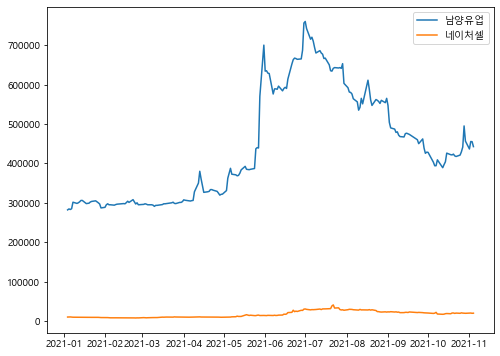

In [25]:
name1 = '남양유업'
name2 = '네이처셀'
fromdate = str(20210101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

df_logscale1 = (df1['종가'])
df_logscale2 = (df2['종가'])
print(get_pvalue((name1, name2)))
plt.figure(figsize=(8, 6))
plt.plot(df_logscale1)
plt.plot(df_logscale2)
plt.legend([f'{name1}',f'{name2}'])
plt.show()

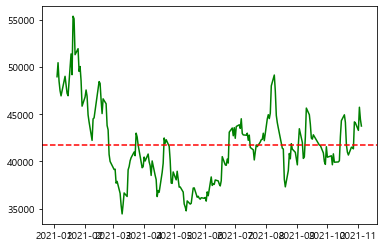

In [21]:
plt.plot(df_logscale1-df_logscale2, color='green', linestyle='-')
plt.axhline((df_logscale1-df_logscale2).mean(), color='red', linestyle='--')
plt.show()

In [22]:
## Normalization (Min-Max Scalar)  ( 0 ~ 1 )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled1 = scaler.fit_transform(np.array(df1['종가']).reshape(len(df1),1))
data_scaled2 = scaler.fit_transform(np.array(df2['종가']).reshape(len(df1),1))

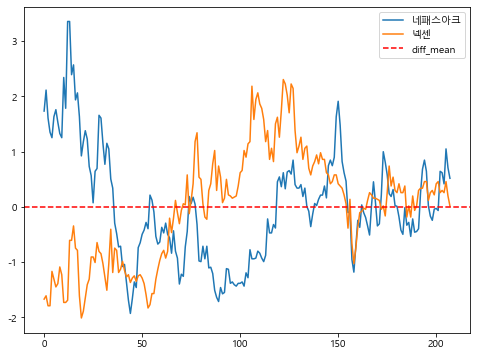

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(data_scaled1)
plt.plot(data_scaled2)
plt.axhline((data_scaled1-data_scaled2).mean(), color='red', linestyle='--')
plt.legend([f'{name1}',f'{name2}','diff_mean'])
plt.show()

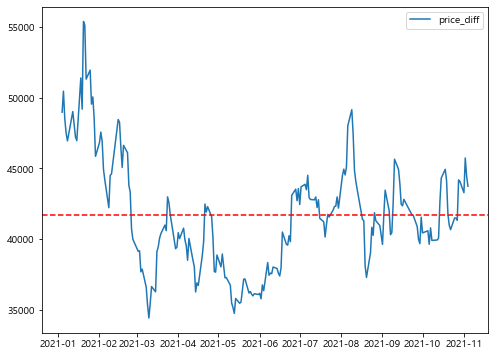

In [24]:

plt.figure(figsize=(8, 6))
plt.plot((df_logscale1-df_logscale2))
plt.axhline((df_logscale1-df_logscale2).mean(), color='red', linestyle='--')

plt.legend([f'price_diff'])
plt.show()